set color cycle ...
register goldfish colorbar as 'gfcmap' ...
update rc params to default ...
set color cycle ...
register goldfish colorbar as 'gfcmap' ...
update rc params to default ...
Initialize rk3 ...


/home/philipp/Python/pypde/pypde/plot/initplot.py:124: UserWarning: Trying to register the cmap 'gfcmap' which already exists.
  plt.cm.register_cmap(name="gfcmap", cmap=gfcmap())


Time: 1.000
Divergence: 2.50e-04
Time: 2.000
Divergence: 1.34e-04
Time: 3.000
Divergence: 1.08e-04
Time: 4.000
Divergence: 1.22e-04
Time: 5.000
Divergence: 1.70e-04
Time: 6.000
Divergence: 1.73e-04
Time: 7.000
Divergence: 1.88e-04
Time: 8.000
Divergence: 1.51e-04
Time: 9.000
Divergence: 1.62e-04
Time: 10.000
Divergence: 1.48e-04
Time: 11.000
Divergence: 1.26e-04
Time: 12.000
Divergence: 1.07e-04
Time: 13.000
Divergence: 9.81e-05
Time: 14.000
Divergence: 1.00e-04
Time: 15.000
Divergence: 1.16e-04
Time: 16.000
Divergence: 1.22e-04
Time: 17.000
Divergence: 1.01e-04
Time: 18.000
Divergence: 1.01e-04
Time: 19.000
Divergence: 1.12e-04
Time: 20.000
Divergence: 1.14e-04
Time: 21.000
Divergence: 1.06e-04
Time: 22.000
Divergence: 9.58e-05
Time: 23.000
Divergence: 8.66e-05
Time: 24.000
Divergence: 8.16e-05
Time: 25.000
Divergence: 8.22e-05
Time: 26.000
Divergence: 8.84e-05
Time: 27.000
Divergence: 9.67e-05
Time: 28.000
Divergence: 9.87e-05
Time: 29.000
Divergence: 9.37e-05
Time: 30.000
Divergence

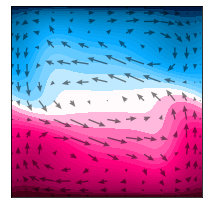

Nubot: 2.046104e+00
Nutop: 2.046104e+00
Nuvol: 1.371920e+00
Initialize rk3 ...
Time: 1.000
Divergence   : 1.70e-01
Divergence NS: 1.72e+00
 |U| = 2.39e-02
 |V| = 7.93e-02
 |T| = 7.17e-03
Time: 2.000
Divergence   : 1.26e-01
Divergence NS: 1.27e+00
 |U| = 2.04e-02
 |V| = 5.12e-02
 |T| = 5.22e-03
Time: 3.000
Divergence   : 9.54e-02
Divergence NS: 9.64e-01
 |U| = 1.91e-02
 |V| = 3.56e-02
 |T| = 4.27e-03
Time: 4.000
Divergence   : 7.61e-02
Divergence NS: 7.67e-01
 |U| = 1.84e-02
 |V| = 2.63e-02
 |T| = 3.80e-03
Time: 5.000
Divergence   : 6.39e-02
Divergence NS: 6.43e-01
 |U| = 1.79e-02
 |V| = 2.06e-02
 |T| = 3.53e-03
Time: 6.000
Divergence   : 5.62e-02
Divergence NS: 5.66e-01
 |U| = 1.76e-02
 |V| = 1.68e-02
 |T| = 3.35e-03
Time: 7.000
Divergence   : 5.14e-02
Divergence NS: 5.17e-01
 |U| = 1.73e-02
 |V| = 1.41e-02
 |T| = 3.21e-03
Time: 8.000
Divergence   : 4.85e-02
Divergence NS: 4.87e-01
 |U| = 1.70e-02
 |V| = 1.21e-02
 |T| = 3.11e-03
Time: 9.000
Divergence   : 4.66e-02
Divergence NS: 4.69e-

In [ ]:
from pypde import *
from dns import rbc2d
from dns import rbc2d_adj
import matplotlib.pyplot as plt

blue = (0 / 255, 137 / 255, 204 / 255)
red = (196 / 255, 0, 96 / 255)
yel = (230 / 255, 159 / 255, 0)

initplot()


def avg_x(f, dx):
    return np.sum(f * dx[:, None], axis=0) / np.sum(dx)


shape = (128, 128)

Pr = 1
Ra = np.logspace(5, 6, 10)
Ra = [1.05e5]
Nu = []
aspect = 1.0
adiabatic = False

time = 0.0
e1, e2, e3 = [], [], []
for R in Ra:
    # -- Solve Navier Stokes
    NS = rbc2d.NavierStokes(
        adiabatic=adiabatic,
        shape=shape,
        dt=0.1,
        tsave=1.0,
        Ra=R,
        Pr=Pr,
        dealias=True,
        integrator="rk3",
        beta=1.0,
        aspect=aspect,
    )
    NS.set_temperature(m=1, amplitude=0.05)
    NS.iterate(200.0)
    # NS.solve_steady_state()
    # evals, _ = NS.solve_stability(shape=(21, 21), plot=True)

    # -- Animate and plot
    NS.plot()
    #NS.animate()

    # -- Evaluate Nu
    Nuz, Nuv = NS.eval_Nu()
    Nu.append(Nuz)

    # Adjoint iteration
    U = NS.U.vhat[:].copy()
    V = NS.V.vhat[:].copy()
    T = NS.T.vhat[:].copy()

    NSA = rbc2d_adj.NavierStokesAdjoint(
        adiabatic=adiabatic,
        shape=shape,
        dt=0.1,
        tsave=1.0,
        Ra=R,
        Pr=Pr,
        dealias=True,
        integrator="rk3",
        beta=1.0,
        aspect=aspect,
    )

    NSA.NS.U.vhat[:] = U
    NSA.NS.V.vhat[:] = V
    NSA.NS.T.vhat[:] = T

    NSA.U.vhat[:] = U
    NSA.V.vhat[:] = V
    NSA.T.vhat[:] = T

    NSA.iterate(80.0)
    NSA.plot()

    NS.U.vhat[:] = NSA.U.vhat[:]
    NS.V.vhat[:] = NSA.V.vhat[:]
    NS.T.vhat[:] = NSA.T.vhat[:]
    Nuz, Nuv = NS.eval_Nu()

    NS.solve_steady_state(maxiter=100)
    Nuz, Nuv = NS.eval_Nu()
    NS.plot() 
    NS.solve_stability()
    NS.write(add_time=False)
